In [1]:
import os
import librosa
import sys
from tqdm import tqdm
import wave
import numpy as np
from librosa import display
from librosa.feature import mfcc
import matplotlib.pyplot as plt

In [2]:
from IPython.display import Audio

In [3]:
os.path.join("../")
DATA="../data/VCTK-Corpus/wav48_silence_trimmed/"

In [4]:
from hyperparameters import HyperParameters as hp

In [5]:
def get_spectrogram(path):
    wav, sr = librosa.load(path)
    mf = mfcc(wav, sr=sr, n_mfcc=80)
    mf = mf.T.astype(np.float32)
    mag = librosa.stft(y=wav,
                       n_fft = hp.n_fft,
                       hop_length = hp.hop_len,
                       win_length = hp.window_len)
    
    mag = np.abs(mag).T.astype(np.float32)
    return mf, mag

In [6]:
def load_specs(fpath):
    fname = os.path.basename(fpath)
    mel, mag = get_spectrogram(fpath)
    t = mel.shape[0]
    num_paddings = hp.r - (t % hp.r) if t % hp.r != 0 else 0 # for reduction
    mel = np.pad(mel, [[0, num_paddings], [0, 0]], mode="constant")
    mag = np.pad(mag, [[0, num_paddings], [0, 0]], mode="constant")
    return fname, mel.reshape((-1, hp.n_mels*hp.r)), mag

In [7]:
speakers = list(set(['p'+str(i) for i in range(225,242)])-set(['p235']))

In [8]:
def create_mels():
    i=0
    for speaker in tqdm(speakers):
        files = os.listdir(os.path.join(DATA, speaker))
        for file in tqdm(files):
            i+=1
            fpath=DATA+speaker+'/'+file
            fname, mel, mag = load_specs(fpath)
            if not os.path.exists("mels"): os.mkdir("mels")
            if not os.path.exists("mags"): os.mkdir("mags")

            if not os.path.exists("mels/"+speaker): os.mkdir("mels/"+speaker)
            if not os.path.exists("mags/"+speaker): os.mkdir("mags/"+speaker)

            np.save("mels/{}/{}".format(speaker, fname.replace("flac", "npy")), mel)
            np.save("mags/{}/{}".format(speaker, fname.replace("flac", "npy")), mag)
            #print(i, file, fpath)

In [123]:
create_mels()

 43%|████▎     | 428/984 [00:51<01:26,  6.41it/s]


 86%|████████▋ | 851/984 [01:43<00:14,  9.26it/s]


 39%|███▉      | 277/706 [00:38<00:55,  7.67it/s]


 92%|█████████▏| 650/706 [01:32<00:07,  7.30it/s]


 29%|██▉       | 292/1004 [00:41<01:39,  7.19it/s]


 63%|██████▎   | 633/1004 [01:31<00:49,  7.52it/s]


 99%|█████████▊| 989/1004 [02:18<00:01,  8.56it/s]


 46%|████▌     | 326/712 [00:55<01:02,  6.19it/s]


 93%|█████████▎| 664/712 [01:50<00:13,  3.57it/s]


 38%|███▊      | 279/732 [00:47<01:10,  6.47it/s]


 84%|████████▎ | 613/732 [01:44<00:23,  5.06it/s]


 31%|███       | 255/822 [00:34<01:33,  6.09it/s]


 82%|████████▏ | 677/822 [01:28<00:19,  7.49it/s]


 53%|█████▎    | 244/462 [00:38<00:25,  8.52it/s]


 20%|██        | 151/754 [00:21<01:15,  7.95it/s]


 71%|███████   | 533/754 [01:15<00:30,  7.25it/s]


 17%|█▋        | 122/714 [00:19<01:25,  6.93it/s]


 65%|██████▍   | 463/714 [01:12<00:55,  4.52it/s]


 12%|█▏        | 111/912 [00:14<01:25,  9.41it/s]


 59%|█████▉    | 542/912 [01:07<00:43,  8.60it/s]


  3%|▎         | 19/678 [00:02<01:33,  7.03it/s]


 53%|█████▎    | 358/678 [00:55<00:40,  7.96it/s]


  2%|▏         | 21/908 [00:04<02:20,  6.30it/s]


 38%|███▊      | 344/908 [00:59<01:39,  5.66it/s]


 73%|███████▎  | 661/908 [01:53<01:47,  2.30it/s]


  9%|▉         | 73/778 [00:12<01:29,  7.84it/s]


 54%|█████▍    | 420/778 [01:06<00:48,  7.44it/s]


 99%|█████████▊| 768/778 [02:01<00:01,  7.03it/s]


 47%|████▋     | 357/758 [00:50<00:52,  7.57it/s]


 99%|█████████▉| 754/758 [01:46<00:00,  4.19it/s]


 46%|████▌     | 341/744 [00:52<00:55,  7.24it/s]


 93%|█████████▎| 689/744 [01:46<00:07,  6.88it/s]


 35%|███▌      | 279/794 [00:43<01:28,  5.82it/s]


 77%|███████▋  | 613/794 [01:35<00:24,  7.30it/s]


100%|██████████| 16/16 [30:48<00:00, 115.51s/it]


In [11]:
a, b,c = load_specs("../data/VCTK-Corpus/wav48_silence_trimmed/p225/p225_001_mic1.flac")

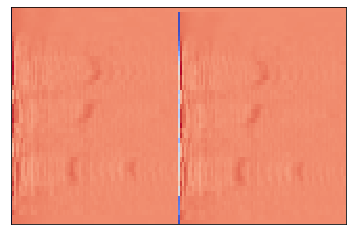

In [16]:
display.specshow(b)

In [20]:
d = np.load("mels/p225/p225_001_mic1.npy")

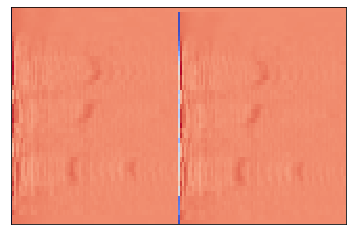

In [21]:
display.specshow(d)